In [51]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('../data/bike-sharing/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [65]:
df['date'] = df['datetime'].apply(lambda x: x.split()[0])
df['year'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
df['month'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
df['hour'] = df['datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [42]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,04


EDA

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='Count'>

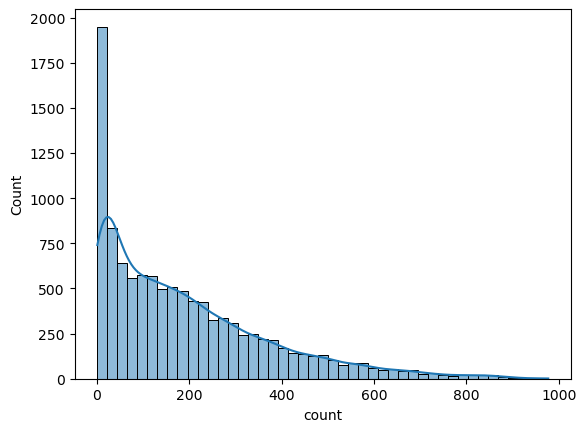

In [111]:
sns.histplot(df['count'], kde = True)

<Axes: xlabel='count', ylabel='Count'>

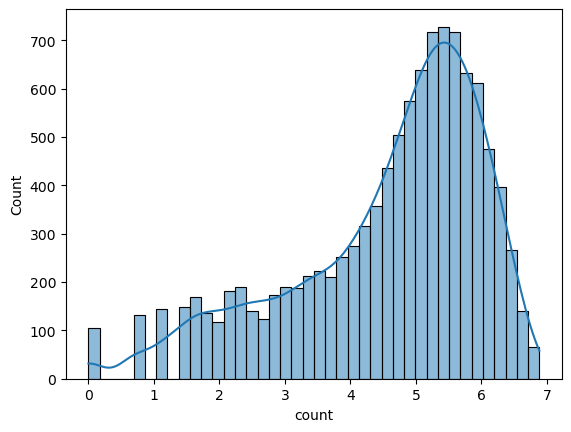

In [55]:
sns.histplot(np.log(df['count']), kde = True)

##### datetime

<Axes: xlabel='hour', ylabel='count'>

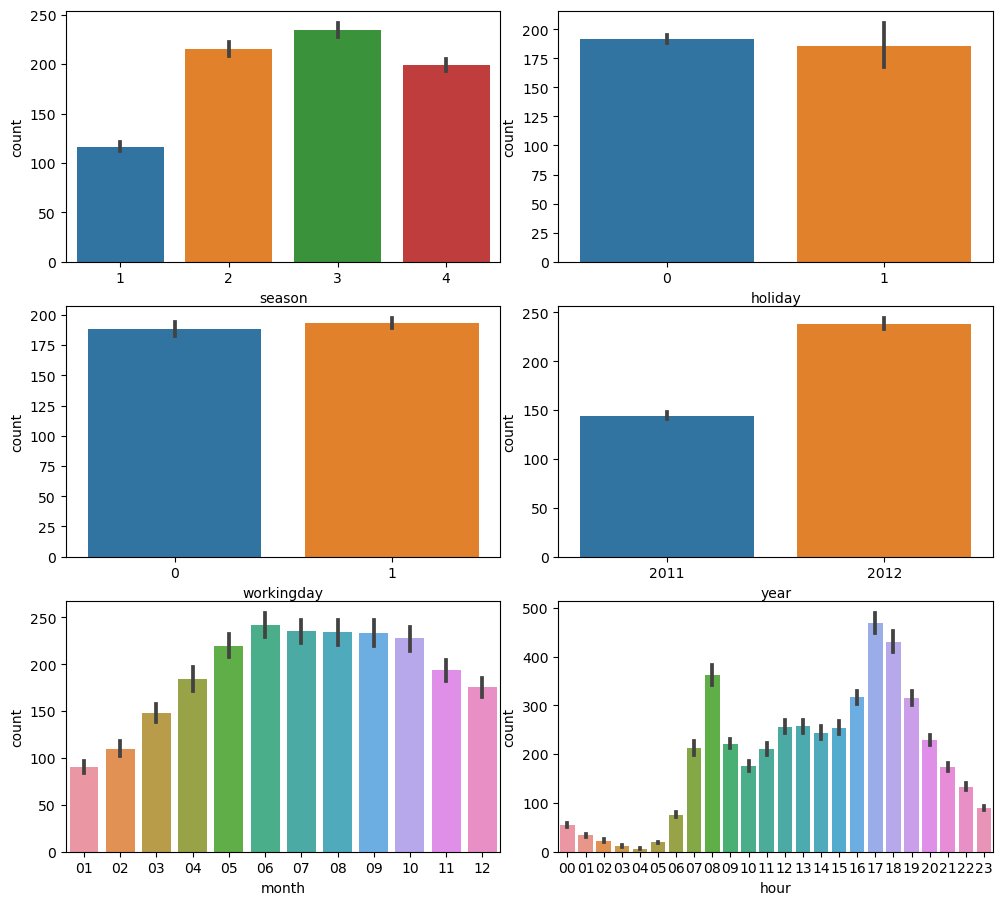

In [67]:
figure, axes = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 9)
plt.tight_layout()

sns.barplot(x='season', y='count', data=df, ax=axes[0, 0])
sns.barplot(x='holiday', y='count', data=df, ax=axes[0, 1])
sns.barplot(x='workingday', y='count', data=df, ax=axes[1, 0])
sns.barplot(x='year', y='count', data=df, ax=axes[1, 1])
sns.barplot(x='month', y='count', data=df, ax=axes[2, 0])
sns.barplot(x='hour', y='count', data=df, ax=axes[2, 1])

==> holiday + workingday : does not seem to have big difference between holidays & non-holidays

##### weather

<Axes: xlabel='season', ylabel='count'>

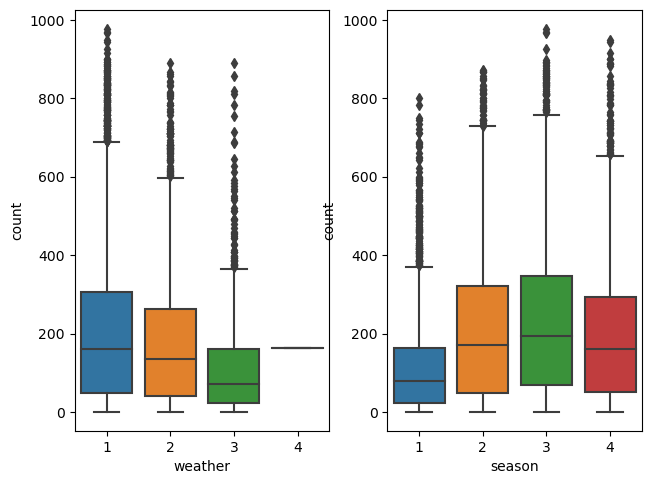

In [71]:
# 'weather', 'temp', 'atemp', 'humidity', 'windspeed'
figure, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()

sns.boxplot(x='weather', y='count', data=df, ax=axes[0])
sns.boxplot(x='season', y='count', data=df, ax=axes[1])

<Axes: xlabel='hour', ylabel='count'>

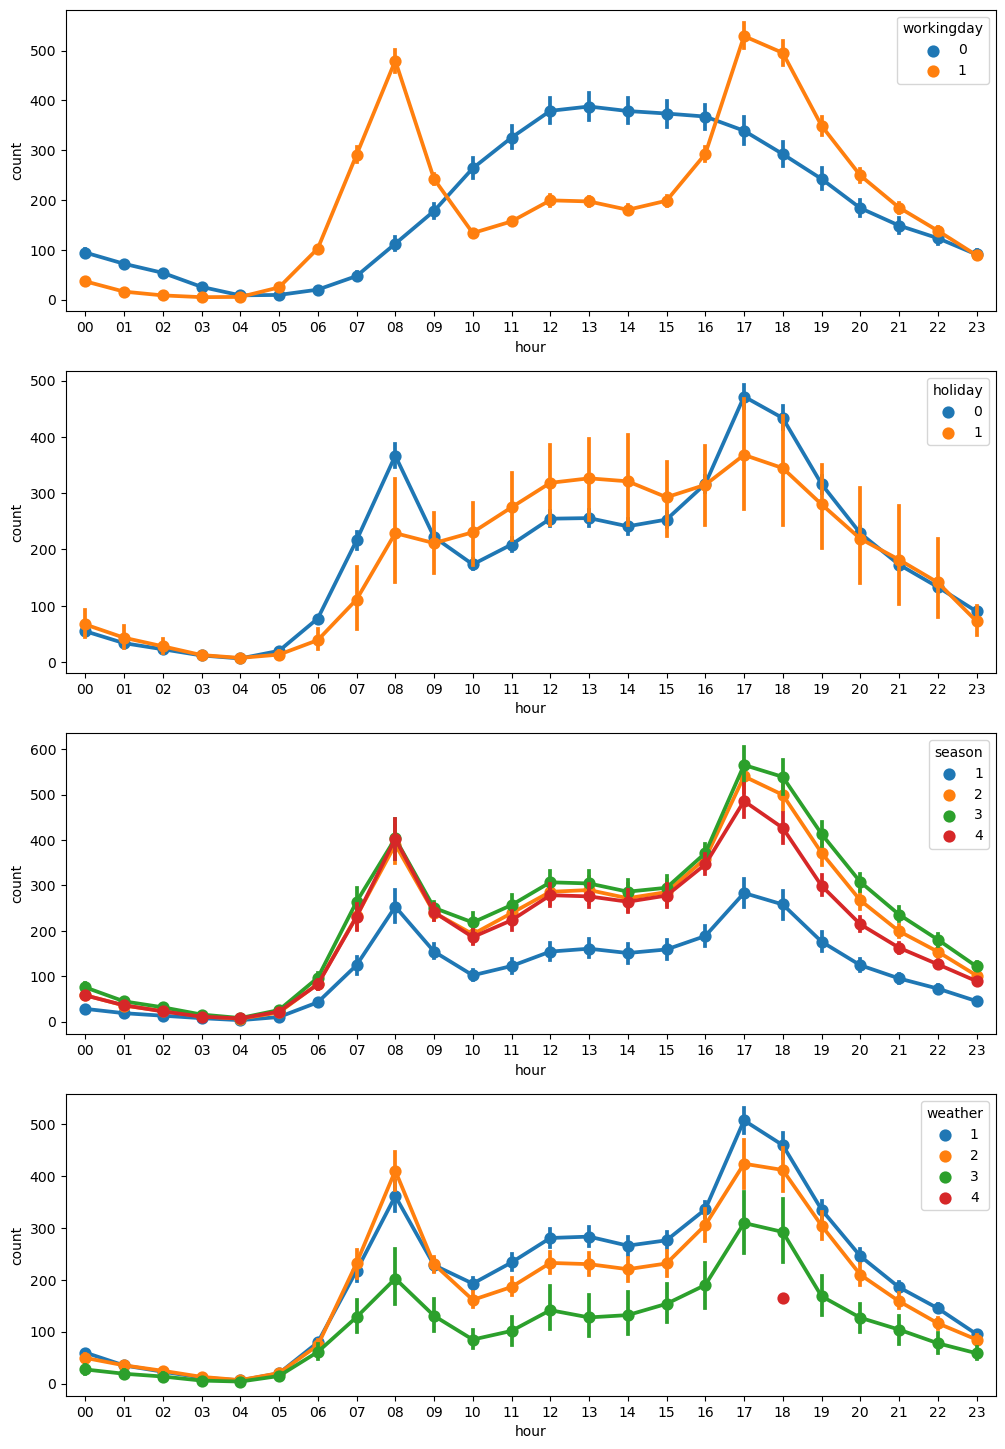

In [74]:
figure, axes = plt.subplots(nrows=4)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=df, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=df, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=df, hue='season', ax=axes[2])
sns.pointplot(x='hour', y='count', data=df, hue='weather', ax=axes[3])

On the working day, bicycles are rented mostly on commute time (6~8 & 16~18). On holidays, people rent throughout the day(7~19). There is an outlier in the data for heavy rain and snow. We should remove outliers for train performance.

#### temp

<Axes: xlabel='humidity', ylabel='count'>

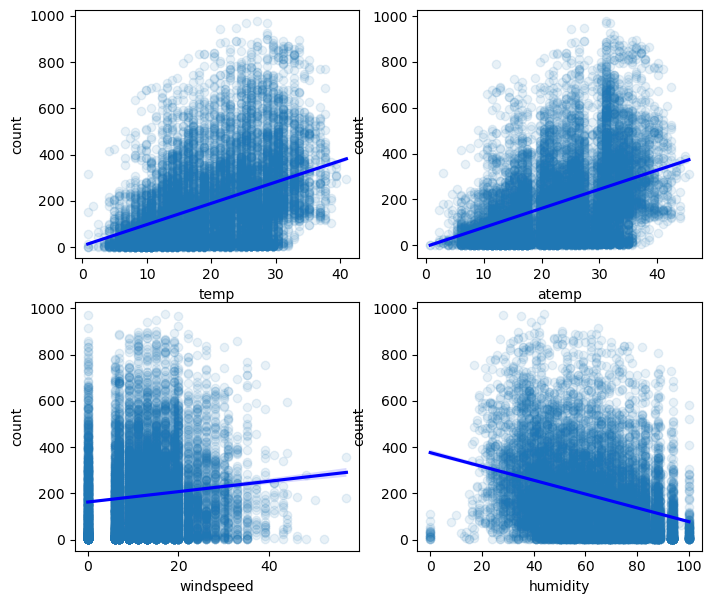

In [75]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(7, 6)
plt.tight_layout()

sns.regplot(x='temp', y='count', data=df, ax=axes[0, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=df, ax=axes[0, 1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=df, ax=axes[1, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=df, ax=axes[1, 1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})

In [78]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'date', 'year', 'month', 'hour'],
      dtype='object')

In [112]:
df = df[df['weather'] != 4]

In [113]:
features = df.drop(['year', 'date', 'count'], axis = 1)

target = df['count']
print(features.columns)
print(target)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'hour'],
      dtype='object')
0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10885, dtype: int64


In [114]:
features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,01,00
1,1,0,0,1,9.02,13.635,80,0.0,01,01
2,1,0,0,1,9.02,13.635,80,0.0,01,02
3,1,0,0,1,9.84,14.395,75,0.0,01,03
4,1,0,0,1,9.84,14.395,75,0.0,01,04


C:\Users\Playdata\AppData\Local\Temp\ipykernel_2112\2187509317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = features.corr()


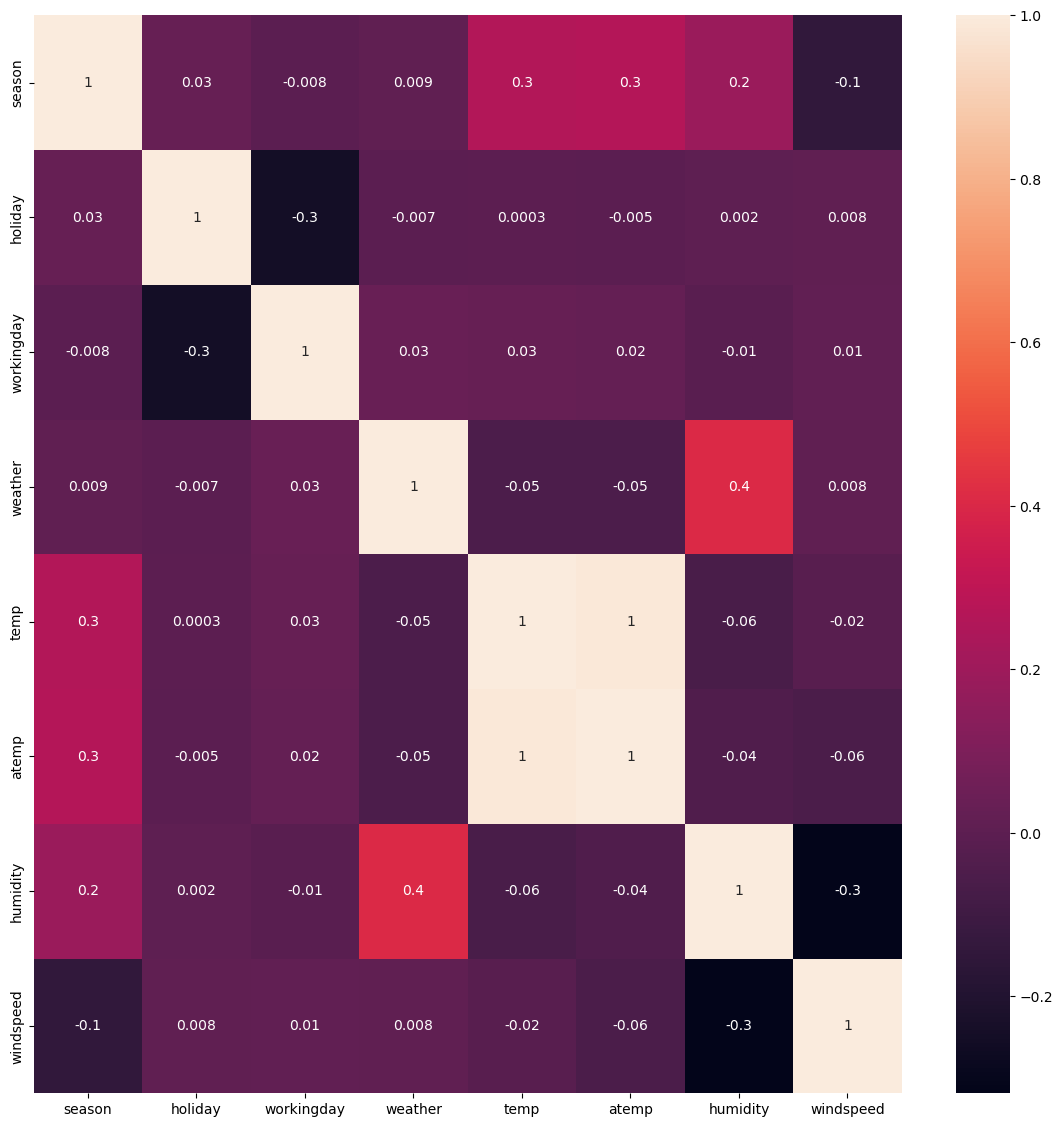

In [115]:
corr = features.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot = True, fmt = '.1g')
plt.show()

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(features)

PCA(n_components=10)

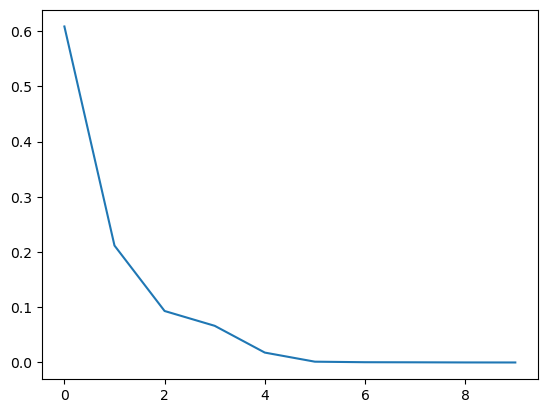

In [87]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

==> 처음 2~3개의 주성분이 대부분의 분산을 표현함을 알 수 있다.

Logistic Regression

In [90]:
pca = PCA(n_components = 0.9)
pca.fit(features)
features_pca = pca.transform(features)

In [95]:
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
rf_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_random_forest_model = GridSearchCV(estimator=model,
                                     param_grid=rf_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

log_y_train = np.log(y_train)

gridsearch_random_forest_model.fit(X_train, log_y_train)

print(f'Optimized hyperparameter: {gridsearch_random_forest_model.best_params_}')

Optimized hyperparameter: {'n_estimators': 120, 'random_state': 42}


eval

In [118]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'RMSLE: {rmsle(log_y_train, preds, True):.4f}')

RMSLE: 0.1495


pred

Text(0.5, 1.0, 'Predicted Test Data Distribution')

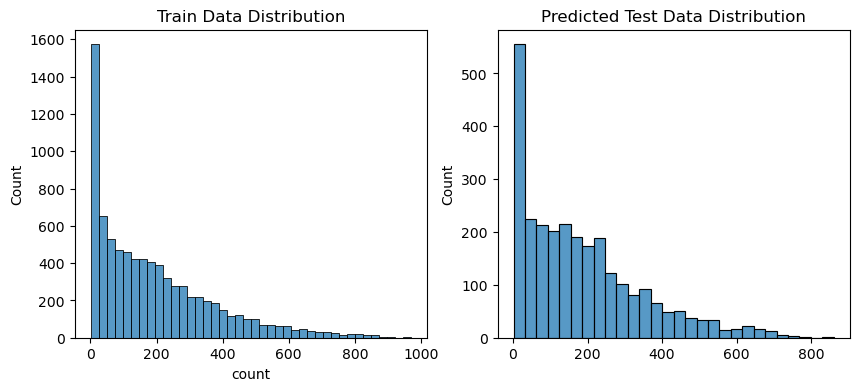

In [104]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y_train, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(preds), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [119]:
features.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'hour'],
      dtype='object')

In [120]:
test_set = pd.read_csv('../data/bike-sharing/test.csv')
test_set.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [121]:
# add : month, hour & delete : datetime
test_set['month'] = test_set['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test_set['hour'] = test_set['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test_set = test_set.drop('datetime', axis = 1)
test_set.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'hour'],
      dtype='object')

Text(0.5, 1.0, 'Predicted Test Data Distribution')

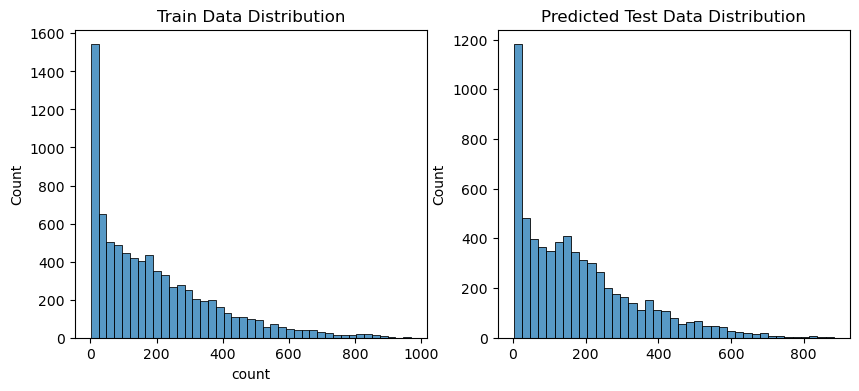

In [122]:
submission_preds = gridsearch_random_forest_model.best_estimator_.predict(test_set)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y_train, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(submission_preds), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [108]:
submission_df = pd.read_csv('../data/bike-sharing/sampleSubmission.csv')

In [123]:
submission_df['count'] = np.exp(submission_preds)
submission_df.to_csv('submission.csv', index=False)